# Testing tsa models and the Twitter API with Tweepy
### Joyster Rodrigues | 2018487

Please do not run this code as the results are not reproducable. The follwoing test was conducted by firstly fethcing tweets via Tweepy which were manually labelled to act as sentiment and sarcasm true values.  

# Imports and configuring Twitter API

In [ ]:
import pandas as pd
import configparser
import tweepy

In [ ]:
#import from server
user_search = 'john wick 4' #user query goes here

In [ ]:
#auth twitter api v1/1.1
cfg = configparser.ConfigParser()
cfg.read('config.ini')

api_key = 'NEtMGC7ctiVydAV26Ze6Lm1M1'
api_key_secret = 'hNXBdQmhgIG4CUURhenB8pD3q97JTXJv03BHdWWC2G7j4AcfSb'
bearer_tok = 'AAAAAAAAAAAAAAAAAAAAAFeQWAEAAAAAJqvhBhUHv78DcQ%%2BG8scJVctVWM4%%3DiPBwZQJo2qkTAQfKoQIs32XyacSFFPOjBDZQYOrUDwNolcGd2D'
access_tok = '806896532146556928-1imjUXss9NXXxDnIVD9CUIxHDhaD0Ge'
access_tok_secret = 'SXI93lw67WNuLzg00vkpHdIF5xEqC33hjqBOvAlKU97tB'

#api v1.1 authorisation
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_tok, access_tok_secret)

api = tweepy.API(auth)

In [ ]:
recent_tweets = api.search_tweets(q=f'"{user_search}" -filter:retweets -filter:media -filter:links', lang='en', result_type='mixed', count=30, include_entities=False)

# Processing tweets 

In [ ]:
col = ['Time', 'Tweet']
tweet_data = []

for tweet in recent_tweets:
    tweet_data.append([tweet.created_at, tweet.text])

df_tweet_data = pd.DataFrame(tweet_data, columns=col)


In [ ]:
print(df_tweet_data)

                        Time  \
0  2023-04-02 15:59:12+00:00   
1  2023-04-03 02:10:55+00:00   
2  2023-04-01 16:35:45+00:00   
3  2023-04-03 13:05:02+00:00   
4  2023-04-03 13:04:38+00:00   
5  2023-04-03 13:03:59+00:00   
6  2023-04-03 13:00:55+00:00   
7  2023-04-03 13:00:40+00:00   
8  2023-04-03 13:00:23+00:00   
9  2023-04-03 13:00:11+00:00   
10 2023-04-03 12:58:51+00:00   
11 2023-04-03 12:56:57+00:00   
12 2023-04-03 12:56:47+00:00   
13 2023-04-03 12:56:46+00:00   
14 2023-04-03 12:56:30+00:00   
15 2023-04-03 12:55:57+00:00   
16 2023-04-03 12:51:13+00:00   
17 2023-04-03 12:49:01+00:00   
18 2023-04-03 12:44:46+00:00   
19 2023-04-03 12:44:17+00:00   
20 2023-04-03 12:42:33+00:00   
21 2023-04-03 12:41:42+00:00   
22 2023-04-03 12:40:55+00:00   
23 2023-04-03 12:40:32+00:00   
24 2023-04-03 12:40:24+00:00   
25 2023-04-03 12:39:24+00:00   
26 2023-04-03 12:36:48+00:00   
27 2023-04-03 12:35:00+00:00   
28 2023-04-03 12:32:15+00:00   
29 2023-04-03 12:31:25+00:00   

       

In [ ]:
df_tweet_data.to_csv('./tweets_for_test.csv')

In [ ]:
def preprocess(df):
    import pandas as pd
    import numpy as np
    import re
    import html
    import string

    from bs4 import BeautifulSoup

    # import output file
    tweets_arr = []
    for item in df['Tweet']:
        tweets_arr.append(item)


    # pre-process
    tweets_clean = []

    for item in tweets_arr:
        soup = BeautifulSoup(item, 'html.parser')
        item = soup.get_text()
        item = item.lower()
        item = item.replace('rt', '')
        item = re.sub(r'http\S+', '', item)
        item = re.sub('@[^\s]+', '', item)
        item = "".join([char for char in item if char not in string.punctuation])
        item = re.sub('[0-9]+', '', item)
        item = re.sub('[^a-zA-Z]', ' ', item)
        tweets_clean.append(item)

    return tweets_clean
    # testing
    # for item in tweets_noemo:
    #     print(f'{item}\n')

In [ ]:
tweets_processed = preprocess(df_tweet_data)

<ipython-input-15-5c31e61487d5>:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(item, 'html.parser')


In [ ]:
print(tweets_processed)

['i enjoyed john wick  and its overthetop glee especially how many stairs he falls down when you think that s al  ', 'just watched john wick  with my sons it was an unending series of gratuitous violent acts    in other words i  ', 'for those who care about these things the dd movie is outperforming initial box office estimates the movie was o  ', ' when they give us john wick ', ' bathe cooper   john wick  with my bros   slept in the living room w   coz it felt cozier   shopping w the bff    ', '  i think mine has a fine layer of dust brushing that off with super mario john wick  and screen unseen    ', ' i saw the trailer while waiting for john wick  tpe is too tediously check the box of a story  ', ' john wick ', ' abeg give me logins make i watch john wick ', ' just wanted to put a request in for john wick  have a wonderful day    ', '   bob odenkirk pitched nobody in  and it came out in  he pitched it  ', 'im waiting for john wick ', ' what about john wick ', 'i want to see john w

In [ ]:
tweets_processed2 = preprocess(df_tweet_data)
print(tweets_processed2)

['i enjoyed john wick  and its overthetop glee especially how many stairs he falls down when you think that s al  ', 'just watched john wick  with my sons it was an unending series of gratuitous violent acts    in other words i  ', 'for those who care about these things the dd movie is outperforming initial box office estimates the movie was o  ', ' when they give us john wick ', ' bathe cooper   john wick  with my bros   slept in the living room w   coz it felt cozier   shopping w the bff    ', '  i think mine has a fine layer of dust brushing that off with super mario john wick  and screen unseen    ', ' i saw the trailer while waiting for john wick  tpe is too tediously check the box of a story  ', ' john wick ', ' abeg give me logins make i watch john wick ', ' just wanted to put a request in for john wick  have a wonderful day    ', '   bob odenkirk pitched nobody in  and it came out in  he pitched it  ', 'im waiting for john wick ', ' what about john wick ', 'i want to see john w

<ipython-input-15-5c31e61487d5>:20: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(item, 'html.parser')


In [ ]:
count = 0
for item in tweets_processed2:
  print(f'{count}: {item}')
  count += 1


0: i enjoyed john wick  and its overthetop glee especially how many stairs he falls down when you think that s al  
1: just watched john wick  with my sons it was an unending series of gratuitous violent acts    in other words i  
2: for those who care about these things the dd movie is outperforming initial box office estimates the movie was o  
3:  when they give us john wick 
4:  bathe cooper   john wick  with my bros   slept in the living room w   coz it felt cozier   shopping w the bff    
5:   i think mine has a fine layer of dust brushing that off with super mario john wick  and screen unseen    
6:  i saw the trailer while waiting for john wick  tpe is too tediously check the box of a story  
7:  john wick 
8:  abeg give me logins make i watch john wick 
9:  just wanted to put a request in for john wick  have a wonderful day    
10:    bob odenkirk pitched nobody in  and it came out in  he pitched it  
11: im waiting for john wick 
12:  what about john wick 
13: i want to see j

# Using preivous tweets and manually labelling them:

In [ ]:
tweets = ['what a freaking friday\n\ndavido’s album timeless out✅\nwizkid music video out ✅\nfalz music out ✅\nclub football is back ✅\njohn wick  out ✅', 'john wick  and creed  were a breath of fresh air\n\nafter seeing a million leftist propaganda pushing movies over t… ', 'john wick  earns m in the film’s worldwide opening weekend\n\namc', 'my john wick  review john wick is autistic coded and his special interest is shooting people who are clearly alre… ', 'john wick  👏🥲', 'goddamnit still can’t get over how fucking insanely good john wick  is', ' gm enjoy john wick ', ' after watching john wick  i can indeed say too many cuts', ' superheroes are done thanks to top gun maverick avatar  and john wick ', ' sir when can we expect john wick  to be available', ' john wick  was mid', 'john wick \ncreed \ndungeons amp dragons\nscream  \na thousand amp one \n\nlord i have so many reasons to go to the movies', 'i gotta go see john wick  🔥', ' im having fun using the socratic method asking people who insist john wick  is a wakeup call to wok… ', 'i need to go watch john wick ', 'i wanna go to the movies tonight i have to see creed and john wick  ', 'john wick  e una shit', 'john wick  is such a good movie from the cinematography down to the plot and acting one of the best films i’ve wa… ', 'john wick  is ass man don’t bother  hours of doodoo the storyline is so trash so they backed it up with too man… ', 'best action movie ever john wick ']

In [ ]:
df_tweets = pd.DataFrame(tweets, columns=['Tweet'])

In [ ]:
print(df_tweets)

                                                Tweet
0   what a freaking friday\n\ndavido’s album timel...
1   john wick  and creed  were a breath of fresh a...
2   john wick  earns m in the film’s worldwide ope...
3   my john wick  review john wick is autistic cod...
4                                       john wick  👏🥲
5   goddamnit still can’t get over how fucking ins...
6                                 gm enjoy john wick 
7    after watching john wick  i can indeed say to...
8    superheroes are done thanks to top gun maveri...
9    sir when can we expect john wick  to be avail...
10                                 john wick  was mid
11  john wick \ncreed \ndungeons amp dragons\nscre...
12                        i gotta go see john wick  🔥
13   im having fun using the socratic method askin...
14                      i need to go watch john wick 
15  i wanna go to the movies tonight i have to see...
16                              john wick  e una shit
17  john wick  is such a goo

In [ ]:
tweets_processed_test = preprocess(df_tweets)

In [ ]:
tweets_processed_test

['what a freaking friday  davido s album timeless out  wizkid music video out   falz music out   club football is back   john wick  out  ',
 'john wick  and creed  were a breath of fresh air  after seeing a million leftist propaganda pushing movies over t  ',
 'john wick  earns m in the film s worldwide opening weekend  amc',
 'my john wick  review john wick is autistic coded and his special interest is shooting people who are clearly alre  ',
 'john wick    ',
 'goddamnit still can t get over how fucking insanely good john wick  is',
 ' gm enjoy john wick ',
 ' after watching john wick  i can indeed say too many cuts',
 ' superheroes are done thanks to top gun maverick avatar  and john wick ',
 ' sir when can we expect john wick  to be available',
 ' john wick  was mid',
 'john wick  creed  dungeons amp dragons scream   a thousand amp one   lord i have so many reasons to go to the movies',
 'i gotta go see john wick   ',
 ' im having fun using the socratic method asking people who ins

# Manually labelling true values

In [ ]:
cols = ['tweets', 'senti_true_label', 'senti_pred', 'senti_pred2', 'sarc_true_label', 'sarc_pred']
senti_true_label = [1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,1,0,1]
senti_pred = [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
senti_pred2 = [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
sarc_true_label = [0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0]
sarc_pred = [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None]
tweet_dict = {
    'tweets': tweets_processed_test,
    'senti_true_label': senti_true_label,
    'senti_pred': senti_pred,
    'senti_pred2': senti_pred2,
    'sarc_true_label': sarc_true_label,
    'sarc_pred': sarc_pred
}
print(len(tweets))
print(len(senti_true_label))
print(len(senti_pred))
print(len(senti_pred2))
print(len(sarc_true_label))
print(len(sarc_pred))

20
20
20
20
20
20


In [ ]:
df_tweet_results = pd.DataFrame(tweet_dict, columns=cols)

In [ ]:
print(df_tweet_results)

                                               tweets  senti_true_label  \
0   what a freaking friday  davido s album timeles...                 1   
1   john wick  and creed  were a breath of fresh a...                 1   
2   john wick  earns m in the film s worldwide ope...                 1   
3   my john wick  review john wick is autistic cod...                 1   
4                                       john wick                     0   
5   goddamnit still can t get over how fucking ins...                 1   
6                                 gm enjoy john wick                  1   
7    after watching john wick  i can indeed say to...                 1   
8    superheroes are done thanks to top gun maveri...                 1   
9    sir when can we expect john wick  to be avail...                 0   
10                                 john wick  was mid                 0   
11  john wick  creed  dungeons amp dragons scream ...                 1   
12                       

# tokenization and padding

In [ ]:
import tensorflow as tf
import keras
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# vectorizing and padding for sarc input
def sarc_tokenizer(input):
    with open('./tokenzier.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    seq = tokenizer.texts_to_sequences(input)
    pad = pad_sequences(seq, maxlen=200, padding='pre', truncating='pre')
    return pad

# vectorizing and padding for sentiment input
def senti_tokenizer(input):
    with open('./senti_tokenzier.pickle', 'rb') as handle:
        senti_tokenizer = pickle.load(handle)

    seq = senti_tokenizer.texts_to_sequences(input)
    pad = pad_sequences(seq, maxlen=200, padding='pre', truncating='pre')
    return pad

# vectorizing and padding for sentiment input
def twitter_senti_tokenizer(input):
    with open('./airline_senti_tokenzier2.pickle', 'rb') as handle:
        senti_tokenizer = pickle.load(handle)

    seq = senti_tokenizer.texts_to_sequences(input)
    pad = pad_sequences(seq, maxlen=50, padding='pre', truncating='pre')
    return pad

In [ ]:
tweet_vect_senti = senti_tokenizer(tweets_processed_test)
tweet_vect_senti2 = twitter_senti_tokenizer(tweets_processed_test)
tweet_vect_sarc = sarc_tokenizer(tweets_processed_test)

# Loading models

In [ ]:
senti_model = tf.keras.models.load_model('./senti_model3.h5')
twitter_senti_model = tf.keras.models.load_model('./twitter_airline_model3.h5')
sarc_model = tf.keras.models.load_model('./sarc_model2.h5')

In [ ]:
#sentiment analysis 
def predict_senti(input):
    senti_model_output = senti_model.predict(input)
    return senti_model_output
    
def predict_senti2(input):
    senti2_model_output = twitter_senti_model.predict(input)
    return senti2_model_output
    
def convert_setiments(model_output):
    senti_arr = []
    for val in model_output:
      if val >= 0.5: #change thershold for better optimised results
        senti_arr.append(1)
      else:
        senti_arr.append(0)
    return senti_arr


#sarcasm detection 
def predict_sarc(input):
    sarc_model_output = sarc_model.predict(input)
    return sarc_model_output
    
def convert_sarc(model_output):
    sarc_arr = []
    for val in model_output:
      if val >= 0.5: #change thershold for better optimised results
        sarc_arr.append(1)
      else:
        sarc_arr.append(0)
    return sarc_arr

# Model predictions

In [ ]:
senti_results = predict_senti(tweet_vect_senti)

1/1 [==============================] - 1s 507ms/step


In [ ]:
senti2_results = predict_senti2(tweet_vect_senti2)

1/1 [==============================] - 0s 297ms/step


In [ ]:
sarc_results = predict_sarc(tweet_vect_sarc)

1/1 [==============================] - 0s 64ms/step


In [ ]:
# exports
senti_export = convert_setiments(senti_results)
senti2_export = convert_setiments(senti2_results)
sarc_export = convert_sarc(sarc_results)

In [ ]:
print(df_tweet_results['senti_true_label'].values)

[1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1]


In [ ]:
print(senti_export)

[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1]


In [ ]:
print(senti2_export)

In [ ]:
print(sarc_export)

[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]


In [ ]:
df_tweet_results['senti_pred'] = senti_export

In [ ]:
df_tweet_results['senti_pred2'] = senti2_export

In [ ]:
df_tweet_results['sarc_pred'] = sarc_export

In [ ]:
print(df_tweet_results)

                                               tweets  senti_true_label  \
0   what a freaking friday  davido s album timeles...                 1   
1   john wick  and creed  were a breath of fresh a...                 1   
2   john wick  earns m in the film s worldwide ope...                 1   
3   my john wick  review john wick is autistic cod...                 1   
4                                       john wick                     0   
5   goddamnit still can t get over how fucking ins...                 1   
6                                 gm enjoy john wick                  1   
7    after watching john wick  i can indeed say to...                 1   
8    superheroes are done thanks to top gun maveri...                 1   
9    sir when can we expect john wick  to be avail...                 0   
10                                 john wick  was mid                 0   
11  john wick  creed  dungeons amp dragons scream ...                 1   
12                       

In [ ]:
df_tweet_results.to_csv('./test1_results.csv')

# evaluation

In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

In [ ]:
def conf_matrix(y_true, y_pred):

  conf_matrix = confusion_matrix(y_true, y_pred)

  print(conf_matrix)

  sns.heatmap(conf_matrix, cmap='YlGn', annot=True, fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

In [ ]:
def class_report(y_true, y_pred):

    print(classification_report(y_true, y_pred))

[[ 1  4]
 [ 4 11]]


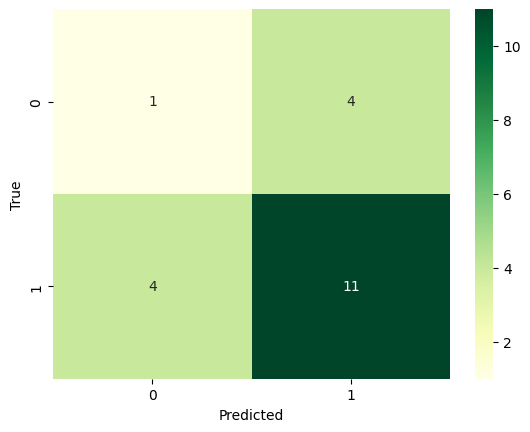

In [ ]:
conf_matrix(df_tweet_results['senti_true_label'].values, df_tweet_results['senti_pred'].values)

[[ 4  1]
 [ 5 10]]


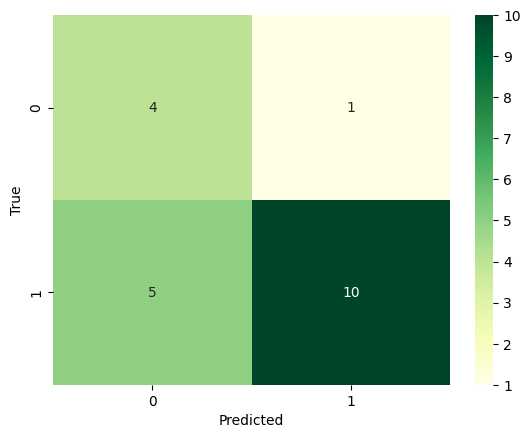

In [ ]:
conf_matrix(df_tweet_results['senti_true_label'].values, df_tweet_results['senti_pred2'].values)

In [ ]:
class_report(df_tweet_results['senti_true_label'].values, df_tweet_results['senti_pred'].values)

              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.73      0.73      0.73        15

    accuracy                           0.60        20
   macro avg       0.47      0.47      0.47        20
weighted avg       0.60      0.60      0.60        20



In [ ]:
class_report(df_tweet_results['senti_true_label'].values, df_tweet_results['senti_pred2'].values)

              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.91      0.67      0.77        15

    accuracy                           0.70        20
   macro avg       0.68      0.73      0.67        20
weighted avg       0.79      0.70      0.72        20



[[12  3]
 [ 4  1]]


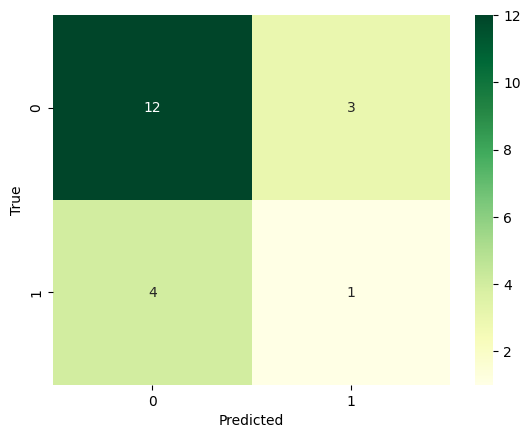

In [ ]:
conf_matrix(df_tweet_results['sarc_true_label'].values, df_tweet_results['sarc_pred'].values)

In [ ]:
class_report(df_tweet_results['sarc_true_label'].values, df_tweet_results['sarc_pred'].values)

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.25      0.20      0.22         5

    accuracy                           0.65        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.62      0.65      0.64        20

